# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats
pd.set_option("display.max_columns", 999)

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


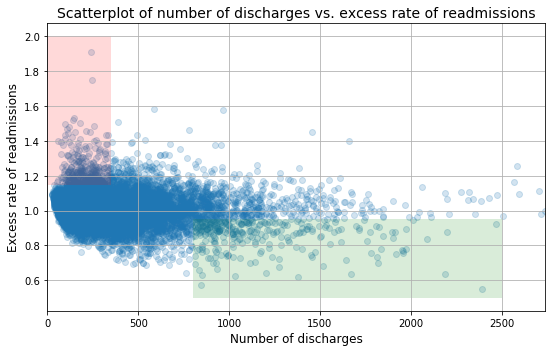

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### A. Do you agree with the above analysis and recommendations? Why or why not?

##### *Overall, rate of readmissions is trending down with increasing number of discharges*<br/>
The plot looks almost parallel to x-axis without any indication that the rate of readmissions is trending down with increasing number
of discharges.
If the graph is replotted to a different scale, the general trend can be ascertained but with the available 
graph the trend cannot be determined.


##### *With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)*<br/>
The values pertaining to lower number of discharges appear to have higher rate of readmissions with
some cases going beyond the readmission rate of 1.2. However, these plots could be outliers in comparison
with the actual dataset. Unless a box plot is visualized, above statement cannot be confirmed.


##### *With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)*<br/>
The data points lying in the area shaded in green are very less in comparison with the dense cluster of 
data points where number of discharges is less than 1000. Again, these points could be outliers and can
only be valiated by plotting a box plot to ascertain how many cases are outliers along the x and y axes.


#### B. Statistics
#### *In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1*


In [5]:
clean_hospital_read_df['Number of Discharges'].dtype

dtype('int64')

In [6]:
clean_hospital_read_df.head(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [7]:
df_disch_100 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] < 100]

In [8]:
mean_excessreadmrate_100 =np.mean(df_disch_100['Excess Readmission Ratio'])
print('The mean excess readmission rate for hospitals/facilities with number ofdischarges <100 is '\
      ,mean_excessreadmrate_100 )

The mean excess readmission rate for hospitals/facilities with number ofdischarges <100 is  1.0226183501683506


The above value approximates to 1.023 which was stated above and is True.

In [9]:
readm_rate_df = df_disch_100.loc[df_disch_100['Excess Readmission Ratio'] > 1]   #filtering ERR values >1
readm_rate_pc = (readm_rate_df.shape[0]/len(df_disch_100))*100       #no.of rows with filter/total no. of rows in df
print ('The percentage of cases with excess readmission rate > 1 is :', readm_rate_pc)
                                                                                                               

The percentage of cases with excess readmission rate > 1 is : 59.18045705279747


The above declaration fo 63% readmission rate is incorrect.

#### *In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1*

In [10]:
df_disch_1000 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] > 1000]
mean_excessreadmrate_1000 =np.mean(df_disch_1000['Excess Readmission Ratio'])
print('The mean excess readmission rate for hospitals/facilities with number ofdischarges >1000 is '\
      ,mean_excessreadmrate_1000 )


The mean excess readmission rate for hospitals/facilities with number ofdischarges >1000 is  0.9783354211663071


The above derived readmission rate is the same as the rate mentioned in Preliminary report

In [11]:
readm_rate_df_1 = df_disch_1000.loc[df_disch_1000['Excess Readmission Ratio'] > 1]   #filtering ERR values >1
readm_rate_pc_1 = (readm_rate_df_1.shape[0]/len(df_disch_1000))*100       #no.of rows with filter/total no. of rows in df
print ('The percentage of cases with excess readmission rate > 1 is :', readm_rate_pc_1)

The percentage of cases with excess readmission rate > 1 is : 44.49244060475162


The actual percentage of readmission rate for where number of discharges >1000 is 44.4, slightly above the stated
value of 44% in the report

#### C. Conclusions

#### *There is a significant correlation between hospital capacity (number of discharges) and readmission rates.*


Let us consider a Hypothesis test where the null hypothesis states that there is correlation between hospital capacity(number of discharges)
and readmission rates i.e. number of discharges is correlated with readmission rates

Alternate hypothesis would be that there is no correlation between the number of discharges and readmission rates

In [12]:
clean_hospital_read_df['Excess Readmission Ratio'].isna().sum()

81

There are 81 NaN values in the 'Excess Readmission Ratio' column, handling those null values

In [13]:
nn_clean_hospital_read_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]

#### *Correlation between hospital capacity (number of discharges) and readmission rates*

In [14]:
np.corrcoef(nn_clean_hospital_read_df['Number of Discharges'], nn_clean_hospital_read_df['Excess Readmission Ratio'])

array([[ 1.        , -0.09739794],
       [-0.09739794,  1.        ]])

The correlation between Number of discharges and Excess Readmission ratio is at -0.097 showing very weak or no correlation

In [15]:
pcc, p = stats.pearsonr(nn_clean_hospital_read_df['Number of Discharges'], nn_clean_hospital_read_df\
                        ['Excess Readmission Ratio'])
pcc

-0.09739794351079353

Using the pearson correlation coefficient function, the correlation was found to be same as above at -0.097

#### *Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.*


As calculated above, there appears very weak/no correlation between the  hospital/facility size (Number of discharges)
and Excessive Readmission Ratio. So the size of the hospital/facility has no bearing on the number of readmissions.
Also, lack of resources cannot be assumed as there is no correlation between the two variables. 

#### Hypothesis test (for statistics calculated above from the dataset) 

$H_0$: The distribution of excess readmission rate (ERR) is the same for large hospitals (number of discharges > 100) and small hospitals (number of discharges <= 100)

$H_A$: The distribution of ERR is different for large hospitals and small hospitals

In [16]:
# Splitting the dataset into two observations by hospital size
large = nn_clean_hospital_read_df[nn_clean_hospital_read_df['Number of Discharges'] > 100]
small = nn_clean_hospital_read_df[nn_clean_hospital_read_df['Number of Discharges'] <= 100]

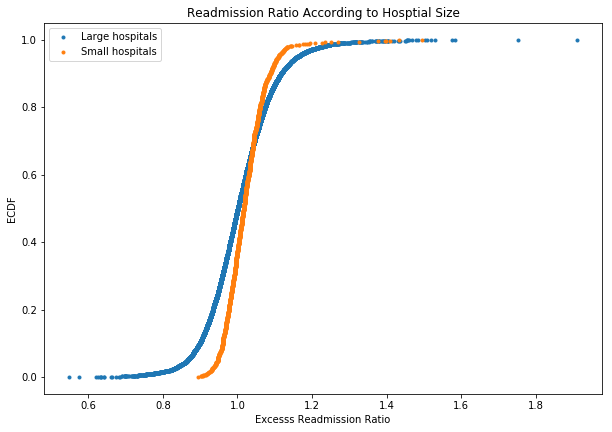

In [17]:
large_mean = np.mean(large['Excess Readmission Ratio'])
small_mean = np.mean(small['Excess Readmission Ratio'])

# Compute ecdfs
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

x_large, y_large = ecdf(large['Excess Readmission Ratio'])
x_small, y_small = ecdf(small['Excess Readmission Ratio'])

# Plotting the differences in ECDF 
fig = plt.figure(figsize=(10, 15))

_ = plt.subplot(2,1,2)
_ = plt.plot(x_large, y_large, marker='.', linestyle='none')
_ = plt.plot(x_small, y_small, marker='.', linestyle='none')
_ = plt.ylabel('ECDF')
_ = plt.xlabel('Excesss Readmission Ratio')
_ = plt.title('Readmission Ratio According to Hosptial Size')
_ = plt.legend(('Large hospitals', 'Small hospitals'))

The figures above show that large hospitals have a fairly normal distribution of excess readmission ratio (ERR).
Small hospitals show a distribution that is skewed slightly toward higher ERRs.


#### 2.Compute and report the observed significance value (or p-value)

In [18]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    return np.mean(data_1) - np.mean(data_2)

# Compute test statistic for observed data
diff_obs = diff_of_means(large['Excess Readmission Ratio'], small['Excess Readmission Ratio'])

# Draw permutation replicates
perm_replicates = np.empty(100000)
for i in range(len(perm_replicates)): 
    # Permute the data
    both = np.concatenate((large['Excess Readmission Ratio'], small['Excess Readmission Ratio']))
    both_perm = np.random.permutation(both)
    perm_large = both_perm[:len(large)]
    perm_small = both_perm[len(large):]
    #Draw replicates
    perm_replicates[i] = diff_of_means(perm_large, perm_small)

# Compute the p-value
p_value = np.sum(abs(perm_replicates) >= abs(diff_obs)) / len(perm_replicates)  

print('observed difference:',diff_obs)
print('p-value:',p_value)

observed difference: -0.016320732987291198
p-value: 0.0


The p-value obtained is 0. Out of the 100,000 trials, none of the  trials produced a difference in means 
as great as observed (0.016). Therefore, we reject the null hypothesis 
i.e. There is statistically significant difference in the ERR for large and small hospitals

#### 3. Report statistical significance for $\alpha$ = .01.

We obtained a p-value of 0 for 100,000 trials which holds good for significance level of 0.01

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance is used to assess whether the evidence against the null hypothesis has reached the 
standard set by α only.

For example, significance level at 0.05 is often expressed by the statement: "The results were significant at (P< 0.05)". The P-value is helpful in providing basic information rather than a statement of significance, because we can then assess significance at any level we choose. 

Practical significance refers to the importance or usefulness of the result in some real-world context. Although the
results are statistically significant, since we have no financial information, it is difficult to assess practical significance from the application perspective.  We cannot say whether the cost of regulation aimed at reducing small hospital's ERR would be worth the investment. 

#### 5. Look at the scatterplot above
#### *What are the advantages and disadvantages of using this plot to convey information?*


The scatter plot above shows the relationship between Excessive rate of readmissions and the number of discharges.
If there is a weak/no-correlation between the plotted variables, the scatter plots takes no specific shape and is
hard to determine the extent and type of correlation between the measured variables.

The scatter plot cannot give quantitative measure of relationship. Also, relationship between only two variables 
can be measured with a scatter plot. 


#### *Construct another plot that conveys the same information in a more direct manner*

In [19]:
err_g1 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] >= 100]
err_l1 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] < 100]

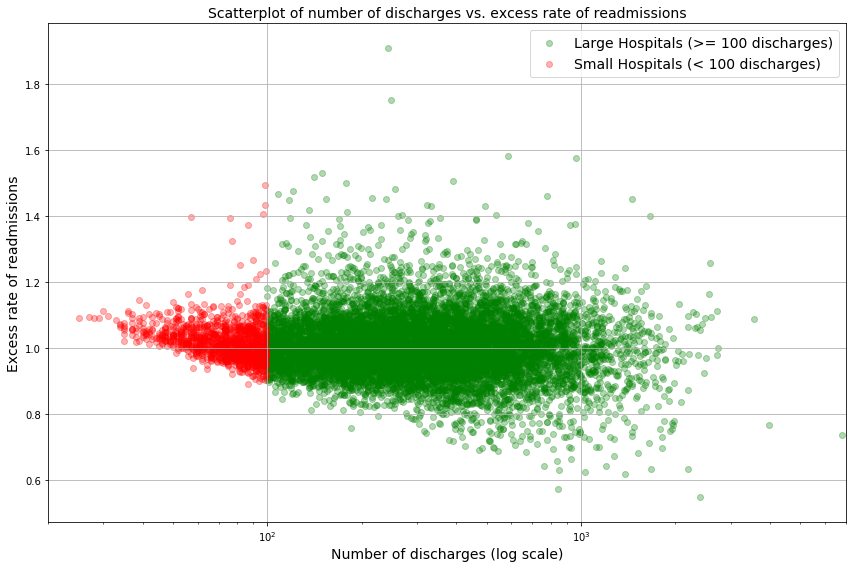

In [20]:
x_large = [a for a in err_g1['Number of Discharges']]
y_large = list(err_g1['Excess Readmission Ratio'])

x_small = [a for a in err_l1['Number of Discharges']]
y_small = list(err_l1['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(12,8))
_ = ax.scatter(x_large, y_large, color='green', alpha=0.3)
_ = ax.scatter(x_small, y_small, color='red', alpha=0.3)


_ = ax.set_xlim([20, 7000])
_ = ax.set_xscale('log')
_ = ax.set_xlabel('Number of discharges (log scale)', fontsize=14)
_ = ax.set_ylabel('Excess rate of readmissions', fontsize=14)
_ = ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
_ = ax.legend(['Large Hospitals (>= 100 discharges)', 'Small Hospitals (< 100 discharges)'], fontsize=14)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_large,y_large)

ax.grid(True)
fig.tight_layout()

The above scatter plot is redrawn to show the size of hospitals (more than 100 and less than 100 discharges) with
number of discharges on log scale to see the spread of data and possibly better correlation (than the original graph)
between the X and Y variables.
